### Kernel and molecular evaluation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload
import GP_reg_mol
customBO = reload(GP_reg_mol)
from GP_reg_mol import *

import GP_Graph_reg_mol
customBO = reload(GP_Graph_reg_mol)
from GP_Graph_reg_mol import *

import boxplotfun
customB = reload(boxplotfun)
from boxplotfun import boxplot, mean_metric_table


In [2]:
### Kernels to test
from gauche.kernels.fingerprint_kernels.tanimoto_kernel import TanimotoKernel
from gauche.kernels.fingerprint_kernels.dice_kernel import DiceKernel
from gauche.kernels.fingerprint_kernels.forbes_kernel import ForbesKernel
from gauche.kernels.fingerprint_kernels.inner_product_kernel import InnerProductKernel 
from gauche.kernels.fingerprint_kernels.minmax_kernel import MinMaxKernel
from gauche.kernels.fingerprint_kernels.sogenfrei_kernel import SogenfreiKernel


### Test for fingerprints

In [96]:
X_mol, y_mol = GP_reg_mol.load_vec_representations(type='ecfp_fingerprints')
string_list_of_kernels = ["Tanimoto", "Dice", "Forbes", "InnerProduct", "MinMax", "Sogenfrei"]

Found 13 invalid labels [nan nan nan nan nan nan nan nan nan nan nan nan nan] at indices [41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 158]
To turn validation off, use dataloader.read_csv(..., validate=False).


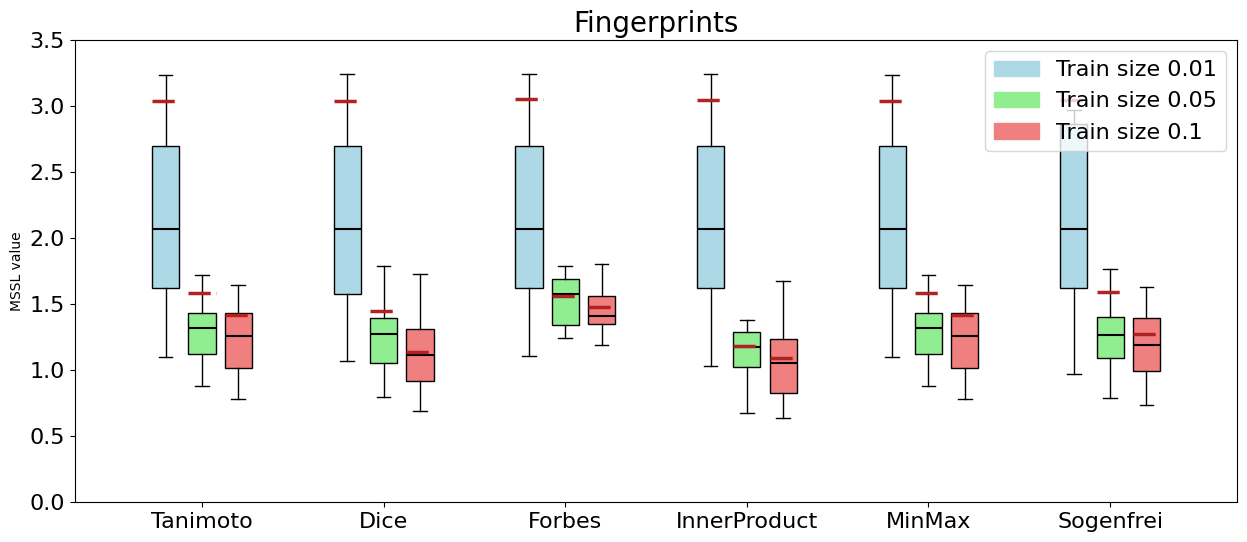


Table:


Mean ± Std MSLL metrics for Fingerprints Representation:
   Train Size      Tanimoto          Dice        Forbes  InnerProduct        MinMax     Sogenfrei
0        0.01  3.043 ± 3.70  3.038 ± 3.70  3.057 ± 3.69  3.050 ± 3.70  3.043 ± 3.70  3.049 ± 3.70
1        0.05  1.585 ± 0.92  1.447 ± 0.86  1.564 ± 0.26  1.184 ± 0.30  1.585 ± 0.92  1.591 ± 1.06
2        0.10  1.417 ± 0.69  1.141 ± 0.29  1.480 ± 0.21  1.094 ± 0.30  1.417 ± 0.69  1.274 ± 0.47


In [97]:
list_of_kernels = [TanimotoKernel, DiceKernel, ForbesKernel, InnerProductKernel, MinMaxKernel, SogenfreiKernel]
list_of_train_sizes = [0.01, 0.05, 0.1]
all_metric_list = []

for train_size in list_of_train_sizes:
	#posible metrics: r2, MSLL, MAE, RMSE
	metric = 'MSLL'
	metric_list = []
	for kernels in list_of_kernels:
		msll = GP_reg_mol.evaluate_model(X_mol, y_mol, kernel=kernels, metric=metric, train_set_size=train_size, n_trials=20)
		metric_list.append(msll)
	all_metric_list.append(metric_list)

boxplot(all_metric_list, list_of_train_sizes, string_list_of_kernels, 'Fingerprints', yLim=(0,3.5))
print('\nTable:\n')
mean_metric_table(all_metric_list, list_of_train_sizes, string_list_of_kernels, 'Fingerprints')

### Test for fragments

In [98]:
X_mol, y_mol = GP_reg_mol.load_vec_representations(type='fragments')

Found 13 invalid labels [nan nan nan nan nan nan nan nan nan nan nan nan nan] at indices [41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 158]
To turn validation off, use dataloader.read_csv(..., validate=False).


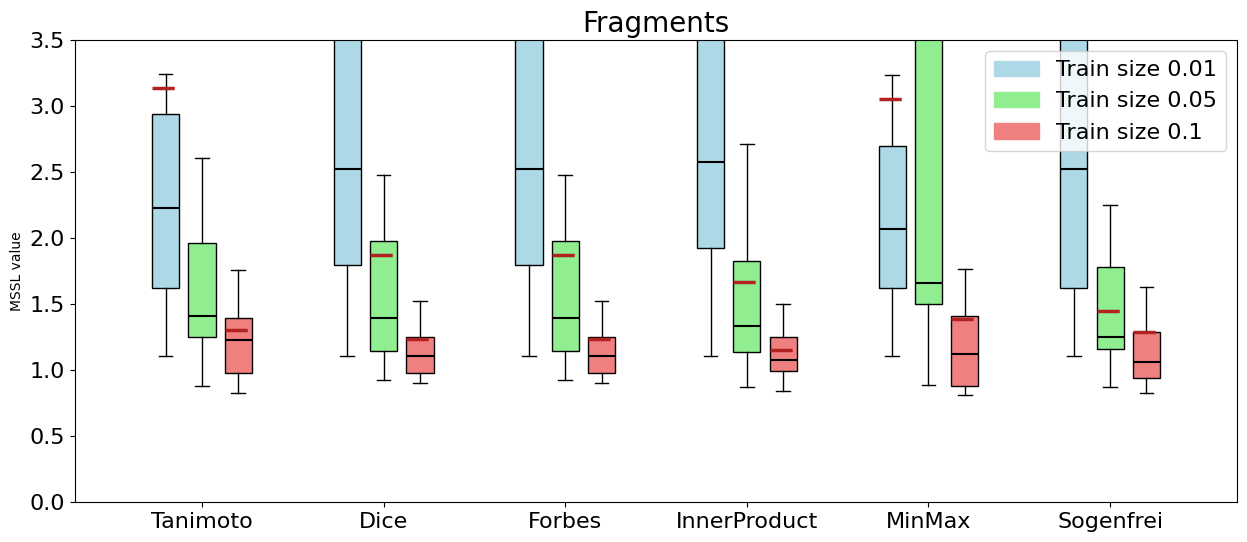


Table:


Mean ± Std MSLL metrics for Fragments Representation:
   Train Size       Tanimoto          Dice        Forbes  InnerProduct         MinMax     Sogenfrei
0        0.01   3.137 ± 3.68  3.580 ± 3.73  3.580 ± 3.73  4.673 ± 4.76   3.057 ± 3.69  4.245 ± 4.45
1        0.05  4.245 ± 11.88  1.874 ± 1.46  1.874 ± 1.46  1.672 ± 1.10  9.073 ± 14.20  1.449 ± 0.48
2        0.10   1.305 ± 0.49  1.235 ± 0.42  1.235 ± 0.42  1.150 ± 0.23   1.386 ± 0.74  1.289 ± 0.74


In [99]:
list_of_kernels = [TanimotoKernel, DiceKernel, ForbesKernel, InnerProductKernel, MinMaxKernel, SogenfreiKernel]
list_of_train_sizes = [0.01, 0.05, 0.1]
all_metric_list = []

for train_size in list_of_train_sizes:
	#posible metrics: r2, MSLL, MAE, RMSE
	metric = 'MSLL'
	metric_list = []
	for kernels in list_of_kernels:
		msll = GP_reg_mol.evaluate_model(X_mol, y_mol, kernel=kernels, metric=metric, train_set_size=train_size, n_trials=20)
		metric_list.append(msll)
	all_metric_list.append(metric_list)

boxplot(all_metric_list, list_of_train_sizes, string_list_of_kernels, 'Fragments', yLim=(0,3.5))
print('\nTable:\n')
mean_metric_table(all_metric_list, list_of_train_sizes, string_list_of_kernels, 'Fragments')

### Test for fragprints

In [100]:
X_mol, y_mol = GP_reg_mol.load_vec_representations(type='ecfp_fragprints')

Found 13 invalid labels [nan nan nan nan nan nan nan nan nan nan nan nan nan] at indices [41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 158]
To turn validation off, use dataloader.read_csv(..., validate=False).


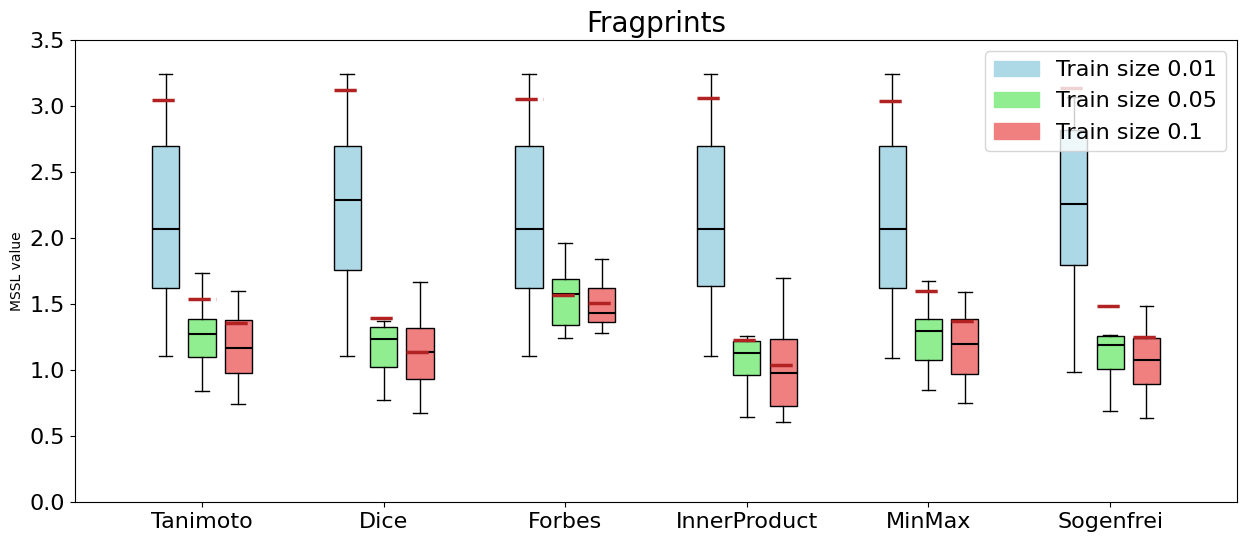


Table:


Mean ± Std MSLL metrics for Fragprints Representation:
   Train Size      Tanimoto          Dice        Forbes  InnerProduct        MinMax     Sogenfrei
0        0.01  3.049 ± 3.69  3.121 ± 3.67  3.057 ± 3.69  3.064 ± 3.69  3.043 ± 3.70  3.135 ± 3.67
1        0.05  1.537 ± 0.90  1.396 ± 0.84  1.573 ± 0.27  1.229 ± 0.54  1.599 ± 1.06  1.485 ± 1.07
2        0.10  1.362 ± 0.68  1.136 ± 0.29  1.512 ± 0.21  1.044 ± 0.35  1.370 ± 0.68  1.254 ± 0.68


In [101]:
list_of_kernels = [TanimotoKernel, DiceKernel, ForbesKernel, InnerProductKernel, MinMaxKernel, SogenfreiKernel]
list_of_train_sizes = [0.01, 0.05, 0.1]
all_metric_list = []

for train_size in list_of_train_sizes:
	#posible metrics: r2, MSLL, MAE, RMSE
	metric = 'MSLL'
	metric_list = []
	for kernels in list_of_kernels:
		msll = GP_reg_mol.evaluate_model(X_mol, y_mol, kernel=kernels, metric=metric, train_set_size=train_size, n_trials=20)
		metric_list.append(msll)
	all_metric_list.append(metric_list)

boxplot(all_metric_list, list_of_train_sizes, string_list_of_kernels, 'Fragprints', yLim=(0, 3.5))
print('\nTable:\n')
mean_metric_table(all_metric_list, list_of_train_sizes, string_list_of_kernels, 'Fragprints')

### mol descriptor

In [3]:
from gpytorch.kernels import RBFKernel, MaternKernel, LinearKernel, RQKernel

In [4]:
X_mol, y_mol = load_mord_descriptors()

Found 13 invalid labels [nan nan nan nan nan nan nan nan nan nan nan nan nan] at indices [41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 158]
To turn validation off, use dataloader.read_csv(..., validate=False).
Mordred descriptor computation takes 55.38152480125427 seconds


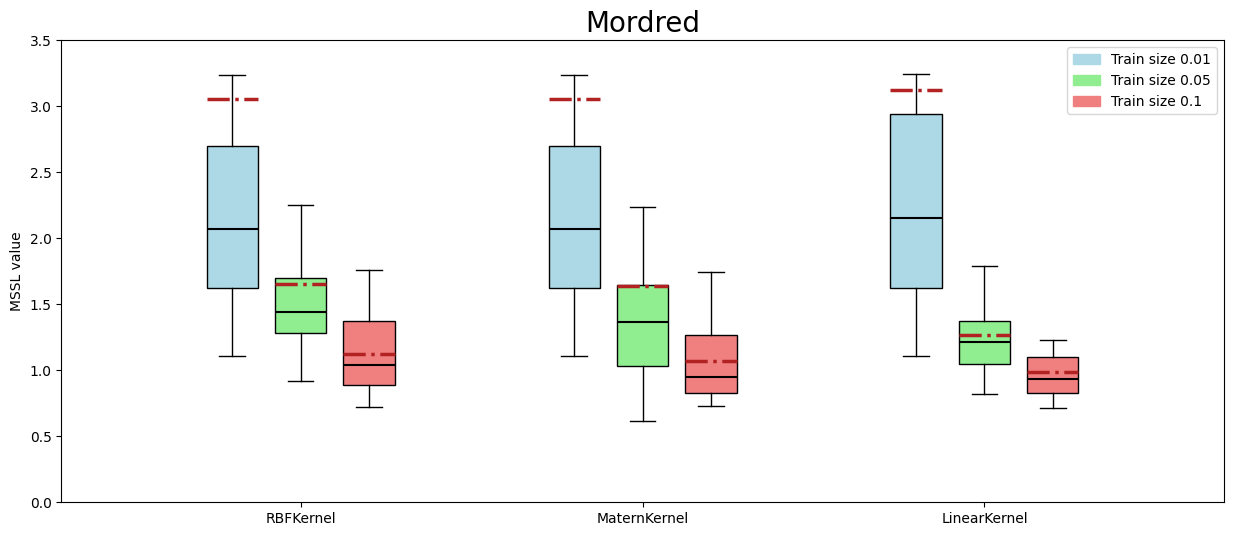


Table:


Mean ± Std MSLL metrics for Mordred Representation:
   Train Size     RBFKernel  MaternKernel  LinearKernel
0        0.01  3.057 ± 3.69  3.057 ± 3.69  3.121 ± 3.68
1        0.05  1.653 ± 0.84  1.637 ± 1.07  1.268 ± 0.35
2        0.10  1.123 ± 0.31  1.068 ± 0.29  0.984 ± 0.22


In [5]:
list_of_kernels = [RBFKernel, MaternKernel, LinearKernel] #RQKernel excluded!
string_list_of_kernels = ['RBFKernel', 'MaternKernel', 'LinearKernel']
list_of_train_sizes = [0.01, 0.05, 0.1]
all_metric_list = []

for train_size in list_of_train_sizes:
	#posible metrics: r2, MSLL, MAE, RMSE
	metric = 'MSLL'
	metric_list = []
	for kernels in list_of_kernels:
		msll = GP_reg_mol.mordred_evaluate_model(X_mol, y_mol, kernel=kernels, metric=metric, train_set_size=train_size, n_trials=20, use_mordred=True)
		metric_list.append(msll)
	all_metric_list.append(metric_list)

boxplot(all_metric_list, list_of_train_sizes, string_list_of_kernels, 'Mordred', yLim=(0, 3.5))
print('\nTable:\n')
mean_metric_table(all_metric_list, list_of_train_sizes, string_list_of_kernels, 'Mordred')

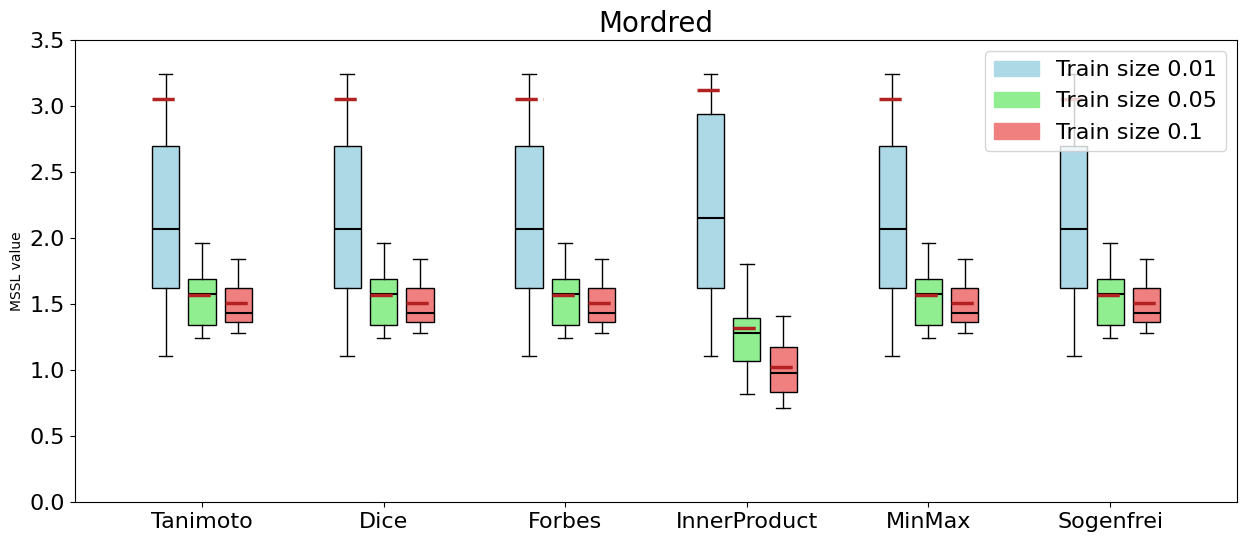


Table:


Mean ± Std MSLL metrics for Mordred Representation:
   Train Size      Tanimoto          Dice        Forbes  InnerProduct        MinMax     Sogenfrei
0        0.01  3.057 ± 3.69  3.057 ± 3.69  3.057 ± 3.69  3.121 ± 3.68  3.057 ± 3.69  3.057 ± 3.69
1        0.05  1.573 ± 0.27  1.573 ± 0.27  1.573 ± 0.27  1.321 ± 0.37  1.573 ± 0.27  1.573 ± 0.27
2        0.10  1.512 ± 0.21  1.512 ± 0.21  1.512 ± 0.21  1.023 ± 0.26  1.512 ± 0.21  1.512 ± 0.21


In [105]:
list_of_kernels = [TanimotoKernel, DiceKernel, ForbesKernel, InnerProductKernel, MinMaxKernel, SogenfreiKernel]
string_list_of_kernels = ["Tanimoto", "Dice", "Forbes", "InnerProduct", "MinMax", "Sogenfrei"]
list_of_train_sizes = [0.01, 0.05, 0.1]
all_metric_list = []

for train_size in list_of_train_sizes:
	#posible metrics: r2, MSLL, MAE, RMSE
	metric = 'MSLL'
	metric_list = []
	for kernels in list_of_kernels:
		msll = GP_reg_mol.mordred_evaluate_model(X_mol, y_mol, kernel=kernels, metric=metric, train_set_size=train_size, n_trials=20, use_mordred=True)
		metric_list.append(msll)
	all_metric_list.append(metric_list)

boxplot(all_metric_list, list_of_train_sizes, string_list_of_kernels, 'Mordred',yLim=(0, 3.5))
print('\nTable:\n')
mean_metric_table(all_metric_list, list_of_train_sizes, string_list_of_kernels, 'Mordred')

In [109]:
loader = MolPropLoader()
loader.load_benchmark("Photoswitch")
loader.featurize("molecular_graphs")
X_mol = loader.features
y_mol = loader.labels

Found 13 invalid labels [nan nan nan nan nan nan nan nan nan nan nan nan nan] at indices [41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 158]
To turn validation off, use dataloader.read_csv(..., validate=False).


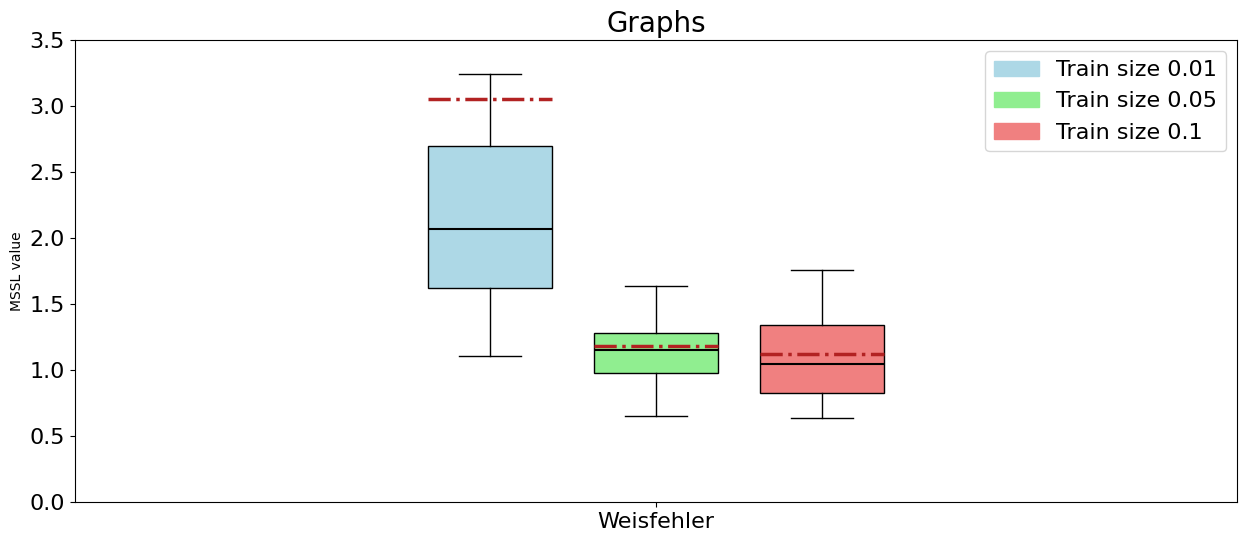


Mean ± Std MSLL metrics for Graphs Representation:
   Train Size    Weisfehler
0        0.01  3.057 ± 3.69
1        0.05  1.187 ± 0.36
2        0.10  1.125 ± 0.36


In [113]:
list_of_train_sizes = [0.01, 0.05, 0.1]
string_list_of_kernels = ['Weisfehler']
all_metric_list = []

for train_size in list_of_train_sizes:
	#posible metrics: r2, MSLL, MAE, RMSE
	metric = 'MSLL'
	metric_list = []
	
	msll = GP_Graph_reg_mol.eval_graph_GP(X_mol, y_mol, metric=metric, train_set_size=train_size, n_trials=20)
	metric_list.append(msll)
	all_metric_list.append(metric_list)

boxplot(all_metric_list, list_of_train_sizes, string_list_of_kernels, 'Graphs',yLim=(0, 3.5))
mean_metric_table(all_metric_list, list_of_train_sizes, string_list_of_kernels, 'Graphs')